# Analysis of: flashstresser
#### File originally retrieved from: http://4lz5rmnkd6f63tmm.onion/db/flashstresser.sql

In [1]:
dumpfile='flashstresser.sql'

## * Libraries that I use to analyse data

In [3]:
import pandas as pd
import numpy as np

from io import StringIO
import re

from IPython.display import display,clear_output

In [2]:
%run '../additional_functions.ipynb'

 Functions loaded!!!!


<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 1: Adaptation to our Booter database schema<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

## 1. Reading the first 'N' (100) lines of the input Booter database file

In [4]:
lines_to_read=100

with open(dumpfile) as myfile:
    firstlines=myfile.readlines()[0:lines_to_read] #put here the interval you want
    for x in firstlines:
        print(x.strip())

-- phpMyAdmin SQL Dump
-- version 3.5.5
-- http://www.phpmyadmin.net
--
-- Host: localhost
-- Generation Time: May 26, 2013 at 07:12 AM
-- Server version: 5.1.68-cll
-- PHP Version: 5.3.17

SET SQL_MODE="NO_AUTO_VALUE_ON_ZERO"; SET time_zone = "+00:00";
/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;
/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;
/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;
/*!40101 SET NAMES utf8 */;

--
-- --------------------------------------------------------
--
-- Table structure for table `API`
--

CREATE TABLE IF NOT EXISTS `API` ( `UDP` text NOT NULL ) ENGINE=MyISAM DEFAULT CHARSET=latin1;
--
-- Dumping data for table `API`
--
INSERT INTO `API` (`UDP`) VALUES ('http://82.196.3.101/send.php?host=[host]&time=[time]&port=[port]&key=ras&user=ras&method=[method] http://bestbooter.com/send.php?key=335rifrt5&host=[host]&time=[time]&port=[port] http://missiontech.us/API/send.php?key=2844459ti59&host=[host]&ti

## 2. Listing tables that have content inserted into the dump file

In [5]:
(pd.Series(list_tables_with_insert(dumpfile)).value_counts()).sort_index()

API          1
blacklist    1
fe           1
gateway      1
iplogs       1
loginlogs    5
logs         1
messages     1
news         1
payments     1
plans        1
tickets      1
users        2
dtype: int64

## How the list above looks like? 

<h2 align='center'>======================================================================
If NOT well-formed SQL dump file then you must first do the following:
======================================================================</h2>

## 3. Removing lines that are not part of the actual content to be analysed

## 4. Splitting and naming tables and columns

<h2 align='center'>======================================================================
Adapting EACH existing table
======================================================================</h2>

## 6.1. Table: 'API'

### How this table looks like without modification?

In [6]:
tablename='API'

pd.read_csv(read_inserted_table1(dumpfile,tablename),delimiter=",",error_bad_lines=False)

,UDP


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type/converter: 
        o 
    - On the column name:
        o 
    - Split columns:
        o 
    - Add required columns:
        o 

## 6.2. Table: 'blacklist'

### How this table looks like without modification?

In [7]:
tablename='blacklist'

pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,ID,IP,note
0,10,127.0.0.1,fuckstick
1,6,68.58.13.198,Classified
2,8,37.221.170.105,NaN
3,9,72.21.81.85,NaN
4,11,72.21.81.85,FBI
5,13,198.81.129.107,CIA
6,14,178.33.198.208,cakes dick


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: blacklist
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o 
    - On the column name:
        o ID -> id
        o IP -> ip
    - Add required columns:
        o  
    - Split columns:
        o 

### Modifying table: 'blacklist'

In [8]:
# Loading the correct table name
df_blacklist = pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False)

# Converting columns

# Changing column names
df_blacklist.rename(inplace=True, columns = {'ID': 'id',
                                            'IP':'ip'})

# Adding missing columns (with "" [for future string] or np.nan [for future float])

###Showing some lines after adapt the table
df_blacklist.head(10)

,id,ip,note
0,10,127.0.0.1,fuckstick
1,6,68.58.13.198,Classified
2,8,37.221.170.105,NaN
3,9,72.21.81.85,NaN
4,11,72.21.81.85,FBI
5,13,198.81.129.107,CIA
6,14,178.33.198.208,cakes dick


## 6.3. Table: 'fe'

### How this table looks like without modification?

In [9]:
tablename='fe'

pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,ID,userID,type,ip,note
0,1,11,f,99.7.66.252,Afri
1,3,21,e,184.151.63.185,nevertrapx
2,5,21,e,174.29.111.208,neversacx
3,10,8,f,92.21.192.90,luke\r\n
4,11,8,e,88.89.219.61,weeD?\r\n
5,12,115,f,86.186.237.65,Ryan Don\\t Touch!
6,13,66,f,173.245.56.177,MayoDwarf
7,15,66,f,99.247.212.76,DXColdFusionXD
8,16,139,f,50.142.160.74,Charlene.!<3
9,17,134,e,202.124.96.151,SANTA


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: friendsenemies
#### Q3: Are there modifications required? 
    - On the table name: 
        o fe -> friendsenemies
    - On the column type: 
        o type -> friendsenemies_type() 
    - On the column name:
        o ID -> id
        o userID -> userid
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'fe'

In [10]:
# Loading the correct table name
df_friendenemies = pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False)

# Converting columns
df_friendenemies['type']=friendsenemies_type(df_friendenemies['type'])

# Changing column names
df_friendenemies.rename(inplace=True, columns = {'ID': 'id',
                                            'userID':'userid'})

# Adding missing columns (with "" [for future string] or np.nan [for future float])

###Showing some lines after adapt the table
df_friendenemies.head(10)

,id,userid,type,ip,note
0,1,11,friend,99.7.66.252,Afri
1,3,21,enemy,184.151.63.185,nevertrapx
2,5,21,enemy,174.29.111.208,neversacx
3,10,8,friend,92.21.192.90,luke\r\n
4,11,8,enemy,88.89.219.61,weeD?\r\n
5,12,115,friend,86.186.237.65,Ryan Don\\t Touch!
6,13,66,friend,173.245.56.177,MayoDwarf
7,15,66,friend,99.247.212.76,DXColdFusionXD
8,16,139,friend,50.142.160.74,Charlene.!<3
9,17,134,enemy,202.124.96.151,SANTA


## 6.4. Table: 'gateway'

### How this table looks like without modification?

In [11]:
tablename='gateway'

pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,email


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: gateways
#### Q3: Are there modifications required? 
    - On the table name: 
        o gateway -> gateways
    - On the column type: 
        o  
    - On the column name:
        o 
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'gateway'

In [12]:
# Loading the correct table name
df_gateways = pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False)

# Converting columns

# Changing column names

# Showing some lines after adapt the tabledf_plans['maxboottime'] = np.nan

# Showing some lines after adapt the table
df_gateways.head(10)

,email


## 6.5. Table: 'iplogs'

### How this table looks like without modification?

In [13]:
tablename='iplogs'

pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,ID,userID,logged,date
0,1,27,123.243.160.138,1362335704
1,2,843,199.21.99.80,1362338690
2,3,18,174.108.22.149,1362369409
3,4,8,81.205.42.137,1362419514
4,5,8,46.129.74.73,1362419524
5,6,8,86.186.3.202,1362419525
6,7,8,46.129.74.73,1362419529
7,8,8,46.129.74.73,1362419554
8,9,8,46.129.74.73,1362419559
9,10,8,208.94.145.108,1362419589


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: logins
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o date -> timestamp2datetime()
    - On the column name:
        o ID -> id
        o userID -> userid
        o logged -> userip
    - Add required columns:
        o username
    - Split columns:
        o 

### Modifying table: 'iplogs'

In [14]:
# Loading the correct table name
df_logins = pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False)

# Converting columns
df_logins['date'] = timestamp2datetime(df_logins['date']) 

# Changing names of columns
df_logins.rename(inplace=True, columns = {'ID': 'id',
                                         'userID': 'userid',
                                         'logged':'userip'})

# Creating empty columns (with "" [for future string] or np.nan [for future float])
df_logins['username']=''


# Showing some lines after adapt the table
df_logins.head(10)

,id,userid,userip,date,username
0,1,27,123.243.160.138,2013-03-03 18:35:04,
1,2,843,199.21.99.80,2013-03-03 19:24:50,
2,3,18,174.108.22.149,2013-03-04 03:56:49,
3,4,8,81.205.42.137,2013-03-04 17:51:54,
4,5,8,46.129.74.73,2013-03-04 17:52:04,
5,6,8,86.186.3.202,2013-03-04 17:52:05,
6,7,8,46.129.74.73,2013-03-04 17:52:09,
7,8,8,46.129.74.73,2013-03-04 17:52:34,
8,9,8,46.129.74.73,2013-03-04 17:52:39,
9,10,8,208.94.145.108,2013-03-04 17:53:09,


## 6.6. Table: 'loginlogs'

### How this table looks like without modification?

In [15]:
tablename='loginlogs'

pd.read_csv(read_inserted_table2(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,username,ip,date
0,admin,99.229.169.138,1362249359
1,mastery,142.134.44.232,1362249431
2,Poppe,90.229.239.18,1362250950
3,google,99.164.164.252,1362251377
4,Mewtu,85.245.62.109,1362251799
5,ycie,81.205.42.137,1362251912
6,madhawk,123.236.189.171,1362252484
7,Poppe,90.229.239.18,1362255695
8,Nyanbot,122.57.224.195,1362256133
9,Help,204.14.79.111,1362257770


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? YES  and APPEND
    - This table looks like: logins
#### Q3: Are there modifications required? 
    - On the table name: 
        o loginlogs -> logins_temp
    - On the column type: 
        o date -> timestamp2datetime()
    - On the column name:
        o ip -> userip
    - Add required columns:
        o id
        o userid
    - Split columns:
        o 

### Modifying table: 'loginlogs'

In [16]:
# Loading the correct table name
df_logins_temp = pd.read_csv(read_inserted_table2(dumpfile, tablename),delimiter=",",error_bad_lines=False)

# Converting columns
df_logins_temp['date'] = timestamp2datetime(df_logins_temp['date']) 

# Changing names of columns
df_logins_temp.rename(inplace=True, columns = {'ip':'userip'})

# Creating empty columns (with "" [for future string] or np.nan [for future float])
df_logins_temp['id']=''
df_logins_temp['userid']=''


# Showing some lines after adapt the table
df_logins_temp.head(10)

,username,userip,date,id,userid
0,admin,99.229.169.138,2013-03-02 18:35:59,,
1,mastery,142.134.44.232,2013-03-02 18:37:11,,
2,Poppe,90.229.239.18,2013-03-02 19:02:30,,
3,google,99.164.164.252,2013-03-02 19:09:37,,
4,Mewtu,85.245.62.109,2013-03-02 19:16:39,,
5,ycie,81.205.42.137,2013-03-02 19:18:32,,
6,madhawk,123.236.189.171,2013-03-02 19:28:04,,
7,Poppe,90.229.239.18,2013-03-02 20:21:35,,
8,Nyanbot,122.57.224.195,2013-03-02 20:28:53,,
9,Help,204.14.79.111,2013-03-02 20:56:10,,


In [17]:
df_logins=df_logins.append(df_logins_temp)

## 6.7. Table: 'logs'

### How this table looks like without modification?

In [19]:
tablename='logs'

pd.read_csv(read_inserted_table3(dumpfile, tablename,"`",[1]),delimiter=",",error_bad_lines=False)

DEBUG (get table): INSERT INTO `logs` (`user`, `ip`, `port`, `time`, `method`, `date`) VALUES


,user,ip,port,time,method,date
0,RaphaSande,187.109.170.4,8000,600,udp,1369407362
1,Mark,178.33.234.202,80,150,tcp,1369407404
2,sinnerz,71.235.201.178,80,900,udp,1369407570
3,RaphaSande,69.162.72.43,25565,600,udp,1369407972
4,Creep,37.59.28.132,25565,600,udp,1369408126
5,Karlo,62.75.184.204,80,300,udp,1369408346
6,thegamewe,158.58.173.203,80,600,udp,1369408426
7,kevin127bror,213.67.137.2,80,200,udp,1369408597
8,Kratus,78.36.140.27,80,300,udp,1369408770
9,vnevermore,66.79.184.152,80,80,udp,1369409004


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: attacks
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o logs -> attacks
    - On the column type: 
        o date -> timestamp2datetime
    - On the column name:
        o user-> username
        o ip -> targetip
        o time -> duration
        o method -> type
    - Add required columns:
        o id
        o userid
        o targeturl        
    - Split columns:
        o 

### Modifying table: 'logs'

In [20]:
# Loading the correct table name
df_attacks = pd.read_csv(read_inserted_table3(dumpfile, tablename,"`",[1]),delimiter=",",error_bad_lines=False)

# Converting columns
df_attacks['date'] = timestamp2datetime(df_attacks['date']) 

# Changing names of columns
df_attacks.rename(inplace=True, columns = {'user':'username',
                                          'ip': 'targetip',
                                          'time':'duration',
                                          'method':'type'})

# Creating empty columns (with "" [for future string] or np.nan [for future float])
df_attacks['id']=np.nan
df_attacks['userid']=np.nan
df_attacks['targeturl']=np.nan

# Showing some lines after adapt the table
df_attacks.head(10)

DEBUG (get table): INSERT INTO `logs` (`user`, `ip`, `port`, `time`, `method`, `date`) VALUES


,username,targetip,port,duration,type,date,id,userid,targeturl
0,RaphaSande,187.109.170.4,8000,600,udp,2013-05-24 14:56:02,NaN,NaN,NaN
1,Mark,178.33.234.202,80,150,tcp,2013-05-24 14:56:44,NaN,NaN,NaN
2,sinnerz,71.235.201.178,80,900,udp,2013-05-24 14:59:30,NaN,NaN,NaN
3,RaphaSande,69.162.72.43,25565,600,udp,2013-05-24 15:06:12,NaN,NaN,NaN
4,Creep,37.59.28.132,25565,600,udp,2013-05-24 15:08:46,NaN,NaN,NaN
5,Karlo,62.75.184.204,80,300,udp,2013-05-24 15:12:26,NaN,NaN,NaN
6,thegamewe,158.58.173.203,80,600,udp,2013-05-24 15:13:46,NaN,NaN,NaN
7,kevin127bror,213.67.137.2,80,200,udp,2013-05-24 15:16:37,NaN,NaN,NaN
8,Kratus,78.36.140.27,80,300,udp,2013-05-24 15:19:30,NaN,NaN,NaN
9,vnevermore,66.79.184.152,80,80,udp,2013-05-24 15:23:24,NaN,NaN,NaN


## 6.8. Table: 'messages'

### How this table looks like without modification?

In [21]:
tablename='messages'

pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,messageid,ticketid,content,sender
0,1,1,Working.,Admin
1,2,2,dsfrdg,Admin
2,3,3,Hey whats up,Admin
3,4,4,Yes the Steam Resolver does not work Steam res...,Admin
4,5,5,It\\s hitting like a truck atm try again.,Admin
5,6,6,Currently no although we will work on a featur...,Admin
6,7,7,fffgfh,Admin
7,8,10,I have updated you.,Admin
8,9,11,I\\m bronze lifetime member. Could log in just...,Client
9,10,12,You would have Platinum Lifetime here can you ...,Admin


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o 
    - On the column name:
        o 
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.9. Table: 'news'

### How this table looks like without modification?

In [22]:
tablename='news'

pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,ID,title,detail,date


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o 
    - On the column name:
        o 
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.10. Table: 'payments'

### How this table looks like without modification?

In [23]:
tablename='payments'

pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,ID,paid,plan,user,email,tid,date
0,1,0.05,80,920,hf.diamond@yahoo.com,75J4505810889372S,1369430055
1,2,5.00,66,922,opietros3@gmail.com,3SP599764G888202C,1369431344
2,3,15.00,67,826,AluAir95@gmail.com,6588089194246584A,1369434707
3,4,15.00,67,907,joannminor9471@yahoo.com,6EL234543D167345L,1369443250
4,5,25.00,72,931,zach.j.smith@gmail.com,59B19714W7154672B,1369450757
5,6,30.00,69,880,kleemartin@t-online.de,00H78920PK528422Y,1369476182
6,7,5.00,66,937,lory-ermejo@live.it,9BW51169NP3184444,1369476375
7,8,10.00,68,939,andreas_kavouri@hotmail.com,50V7141949681860K,1369481022
8,9,5.00,66,884,ngoj3000@gmail.com,3U41391264641894C,1369482720
9,10,5.00,66,924,brunetto-angioni@tiscali.it,0L086667KV695845A,1369487839


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? YES 
    - This table looks like: payments
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o date -> timestamp2datetime()
    - On the column name:
        o ID -> id
        o user -> userid
        o paid -> amountpaid 
        o email -> paymentemail 
        o plan -> planid
    - Add required columns:
        o username
    - Split columns:
        o 

### Modifying table: 'payments'

In [24]:
# Loading the correct table name
df_payments = pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False)

# Converting columns
df_payments['date'] = timestamp2datetime(df_payments['date']) 

# Changing names of columns
df_payments.rename(inplace=True, columns = {'ID':'id',
                                           'user':'userid',
                                           'paid': 'amountpaid',
                                           'email': 'paymentemail',
                                           'plan':'planid'})

# Creating empty columns (with "" [for future string] or np.nan [for future float])
df_payments['username']=''


# Showing some lines after adapt the table
df_payments.head(10)

,id,amountpaid,planid,userid,paymentemail,tid,date,username
0,1,0.05,80,920,hf.diamond@yahoo.com,75J4505810889372S,2013-05-24 21:14:15,
1,2,5.00,66,922,opietros3@gmail.com,3SP599764G888202C,2013-05-24 21:35:44,
2,3,15.00,67,826,AluAir95@gmail.com,6588089194246584A,2013-05-24 22:31:47,
3,4,15.00,67,907,joannminor9471@yahoo.com,6EL234543D167345L,2013-05-25 00:54:10,
4,5,25.00,72,931,zach.j.smith@gmail.com,59B19714W7154672B,2013-05-25 02:59:17,
5,6,30.00,69,880,kleemartin@t-online.de,00H78920PK528422Y,2013-05-25 10:03:02,
6,7,5.00,66,937,lory-ermejo@live.it,9BW51169NP3184444,2013-05-25 10:06:15,
7,8,10.00,68,939,andreas_kavouri@hotmail.com,50V7141949681860K,2013-05-25 11:23:42,
8,9,5.00,66,884,ngoj3000@gmail.com,3U41391264641894C,2013-05-25 11:52:00,
9,10,5.00,66,924,brunetto-angioni@tiscali.it,0L086667KV695845A,2013-05-25 13:17:19,


## 6.11. Table: 'tickets'

### How this table looks like without modification?

In [25]:
tablename='tickets'

pd.read_csv(read_inserted_table1(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,id,subject,content,status,username
0,1,Test,Test,Closed,Mastery
1,2,fggg,fg,Closed,Admin
2,3,Test 2,Testing to see if this works.,Closed,Mastery
3,4,Steam Resolver,Everytime I use the steam resolver I input the...,Waiting for user response,lm0drevil
4,5,Doesn\\t hit!,Hey bro I am excited about your booter and hav...,Waiting for user response,american
5,6,IP Logger,Can we make the link for the IP Logger differe...,Waiting for user response,DXColdFusionXD
6,7,fgfg,Enter your message here!fffff,Closed,Admin
7,10,900 seconds instead of 3600,Hello\r\n\r\nI bought the 3600 lifetime packag...,Waiting for user response,domi
8,14,skype resolver,hello my skype ip resolver has not been workin...,Waiting for user response,gunner3349
9,15,Hitting Power atm?,Hello my Question are what are the actually hi...,Waiting for user response,Karlo


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o 
    - On the column name:
        o 
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.12. Table: 'users'

### How this table looks like without modification?

In [26]:
tablename='users'

pd.read_csv(read_inserted_table2(dumpfile, tablename),delimiter=",",error_bad_lines=False).head(10)

,ID,username,password,email,rank,membership,expire,status
0,4,Poppe,3f706ce3b63dfcfab8835acfcfee1f0bb5d95ecc,negatr00n@gmail.com,0,57,1364930514,0
1,5,tec1,1adc8691f8805276baa2b36862d63ea208dcc940,rockwings00@gmail.com,0,71,1526587038,0
2,6,google,759730a97e4373f3a0ee12805db065e3a4a649a5,googlepops@gmail.com,0,0,0,0
3,7,Mewtu,24ee40936359b9a1f241ab8d3135149aa53a12b2,jorgegodinho3@gmail.com,0,0,0,0
4,8,ycie,141248fa91c52a213353d0bba6b7e827e8472ba6,ycie@live.nl,0,73,1524698518,0
5,9,madhawk,10e6d337c871aab90e191da78a8338addf52ce12,tmkcama@gmail.com,0,0,0,0
6,127,lukesanchezz,d14b17a9f0dd009b5eee643f1bd2103f7542fa6e,lukee2121@gmail.com,0,0,0,0
7,11,Help,cf7d73bb6ed704cf1c5d23f3bd537d07a85b95e2,helpscreations@gmail.com,0,61,1520024959,0
8,12,DarkComet,80718abd1d4604e1d0f68aa116f0dfa0c4a14f36,darkcometderp333@gmail.com,0,0,1364944965,0
9,13,yahtalksucks,8473d7d363baa4cea898d9c0752ff0fc8ef425cc,phatbeatz___@hotmail.com,0,0,0,0


#### Q1: Is this table different from other previous loaded table? YES 
#### Q2: Is this table similar to any table in the generic Booter database schema? YES 
    - This table looks like: users
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o expire -> timestamp2datetime()
    - On the column name:
        o ID -> userid
        o email -> useremail 
        o membership -> planid
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'users'

In [27]:
# Loading the correct table name
df_users = pd.read_csv(read_inserted_table2(dumpfile, tablename),delimiter=",",error_bad_lines=False)

# Converting columns
df_users['expire'] = timestamp2datetime(df_users['expire']) 

# Changing names of columns
df_users.rename(inplace=True, columns = {'ID':'userid',
                                           'email':'useremail',
                                           'membership': 'planid'})

# Creating empty columns (with "" [for future string] or np.nan [for future float])

# Showing some lines after adapt the table
df_users.head(10)

,userid,username,password,useremail,rank,planid,expire,status
0,4,Poppe,3f706ce3b63dfcfab8835acfcfee1f0bb5d95ecc,negatr00n@gmail.com,0,57,2013-04-02 19:21:54,0
1,5,tec1,1adc8691f8805276baa2b36862d63ea208dcc940,rockwings00@gmail.com,0,71,2018-05-17 19:57:18,0
2,6,google,759730a97e4373f3a0ee12805db065e3a4a649a5,googlepops@gmail.com,0,0,1970-01-01 00:00:00,0
3,7,Mewtu,24ee40936359b9a1f241ab8d3135149aa53a12b2,jorgegodinho3@gmail.com,0,0,1970-01-01 00:00:00,0
4,8,ycie,141248fa91c52a213353d0bba6b7e827e8472ba6,ycie@live.nl,0,73,2018-04-25 23:21:58,0
5,9,madhawk,10e6d337c871aab90e191da78a8338addf52ce12,tmkcama@gmail.com,0,0,1970-01-01 00:00:00,0
6,127,lukesanchezz,d14b17a9f0dd009b5eee643f1bd2103f7542fa6e,lukee2121@gmail.com,0,0,1970-01-01 00:00:00,0
7,11,Help,cf7d73bb6ed704cf1c5d23f3bd537d07a85b95e2,helpscreations@gmail.com,0,61,2018-03-02 21:09:19,0
8,12,DarkComet,80718abd1d4604e1d0f68aa116f0dfa0c4a14f36,darkcometderp333@gmail.com,0,0,2013-04-02 23:22:45,0
9,13,yahtalksucks,8473d7d363baa4cea898d9c0752ff0fc8ef425cc,phatbeatz___@hotmail.com,0,0,1970-01-01 00:00:00,0


<h2 align='center'>======================================================================
<br>Final step of the manual part
======================================================================</h2>

In [35]:
%run '../reviewing_consistency.ipynb'



Overview of records in the adapted Booter database:


,df_attacks,df_blacklist,df_friendsenemies,df_gateways,df_logins,df_payments,df_plans,df_servers,df_settings,df_users,df_webshells
0,657,7,0,0,6501,13,0,0,0,749,0




Overview in latex format for copy-&-paste:

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  attacks &  blacklist &  friendsenemies &  gateways &  logins &  payments &  plans &  servers &  settings &  users &  webshells \\
\midrule
0 &      657 &          7 &               0 &         0 &    6501 &        13 &      0 &        0 &         0 &    749 &          0 \\
\bottomrule
\end{tabular}



<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 2: Data Enrichment<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

In [36]:
%run '../data_enrichment.ipynb'

- Table logins enriched (IP to AS): df_logins_iptoasn
- Table attacks enriched (IP to AS): df_attacks_iptoasn
- Table friendsenemies enriched (IP to AS): df_friendsenemies_iptoasn
- Table blacklist enriched (IP to AS): df_blacklist_iptoasn
- Table logins enriched (Tor checked): df_logins_torcheck
- Table attacks enriched (Tor checked): df_attacks_torcheck
- Table friendsenemies enriched (Tor checked): df_friendsenemies_torcheck
- Table blacklist enriched (Tor checked): df_blacklist_torcheck


<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 3: Automatic Analysis
<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h3> 

1. Attacks per day


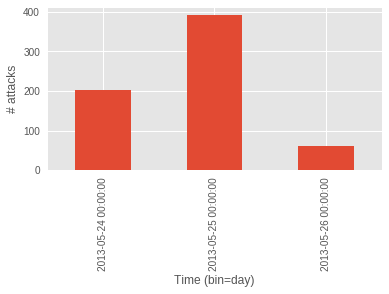

2. Number of attacks performed by users


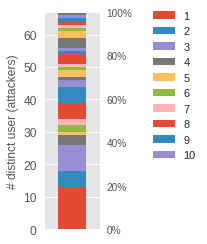

3. Attacks on the same target


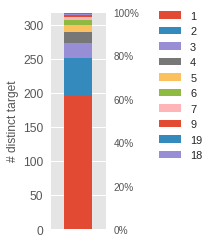

4. Intersection between users, customers and attackers.


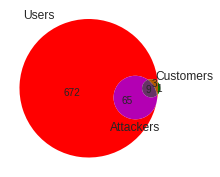

5. User login times


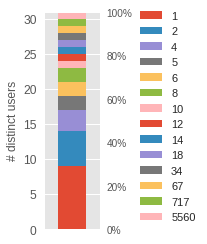



6. From 657 total attack records, 94 have a login time to be correlated with. The difference between the attack and the closest login time is on average 7 days 10:24:02.106382, while the median is equal to 5 days 01:32:40.500000


7. The number of distinct users that access this Booter via TOR is equal to 14


8. User distinct IP addresses


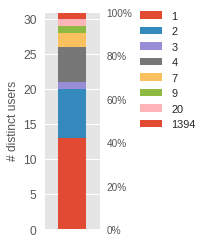

9. User distinct payments


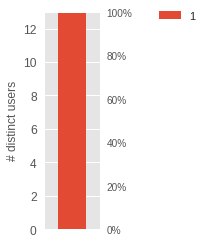

10. Amount of money paid.


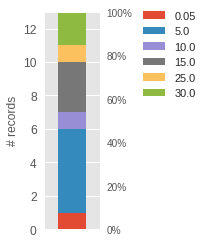



11. The (estimated) amount of money earned by this Booter is equal to US$ 165.05


12. Countries from where users (IPs) accessed the Booter.


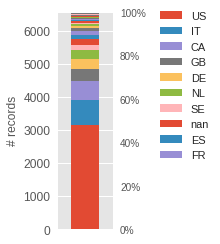

13. Countries of blacklisted IPs.


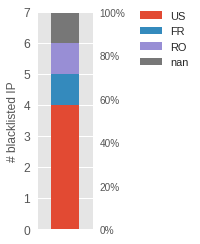

14. Target (IP) countries.


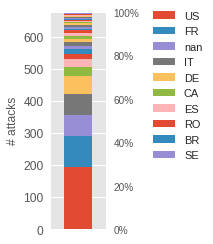

16. Who attacked whom in the country level.


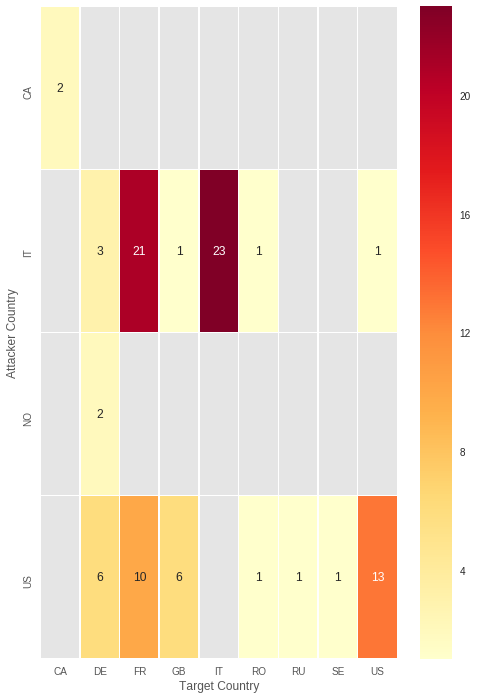

In [37]:
%run '../automated_analysis.ipynb'

<h2 align="center">!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
Query Interface<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

In [31]:
%run '../search_background.ipynb'